Supply Chain Management
Predictive Analytics for Sustainable Supply Chain Management Using regression 

Objective
The primary objective of this project is to develop a machine learning model that predicts the Supply Chain Risk (%) of companies based on their supply chain management (SCM) practices, technology utilization, and sustainability efforts. By accurately forecasting Supply Chain Risk ratio, the model will help companies optimize their supply chain operations, reduce costs, and enhance overall performance.

In [2]:
import numpy as np #Numpy or numerical python is used for numerical computing it supports n dimensional aaray
import pandas as pd #Pandas is a Python library for data manipulation and analysis.
import seaborn as sns #provides a high level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt #matplotlib is a powerful python library used for creating static interactive visualizations.


from sklearn.preprocessing import LabelEncoder #converts categorical variables into numerical format.
from sklearn.preprocessing import OrdinalEncoder #a preprocessing technique used for converting categorical data into numeric values that preserve their inherent ordering.
from sklearn.preprocessing import StandardScaler #standardizing features by removing the mean and scaling to unit variance5

from sklearn.model_selection import train_test_split#used to divide datasets into training and testing subsets.
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
read_file = pd.read_excel("SCM Dataset.xlsx")
read_file.to_csv("SCM Dataset.csv",index=None,header=True)
df=pd.DataFrame(pd.read_csv("SCM Dataset.csv"))
df.head()
#reads the csv file and converts it to dataframe which gives structured table

,Company Name,SCM Practices,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Technology Utilized,Environmental Impact Score,Supply Chain Agility,...,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supplier Collaboration Level,Supply Chain Resilience Score,Supplier Relationship Score
0,Apple,Agile SCM,300,7.0,8,94,91,"ERP, AI, Blockchain",70.0,High,...,High,Advanced,Medium,$700B,85,12,7,High,90,85
1,Microsoft,Lean Manufacturing,200,5.2,15,91,89,"ERP, AI, Robotics",75.0,High,...,Medium,Advanced,Medium,$800B,80,10,12,Medium,85,85
2,Google,Cross-Docking,20000,7.5,4,95,90,"AI, ERP, Blockchain",70.0,High,...,High,Advanced,High,$300B,80,12,5,High,90,85
3,Amazon,Agile SCM,500,10.5,15,95,90,"ERP, AI, Blockchain",70.0,High,...,High,Advanced,Medium,$1000B,78,8,12,Medium,88,85
4,Facebook,Lean Manufacturing,100,5.8,12,89,88,"ERP, AI, Robotics",75.0,High,...,High,Advanced,Medium,$400B,80,10,10,Medium,85,80


In [4]:
df['Cost of Goods Sold (COGS)'] = df['Cost of Goods Sold (COGS)'].apply(func=lambda x: float(x.replace('$', '').replace(',', '').replace('B', '')))
df.head()
#here the lambda function is an anonymous (one-line) function that processes each value in the column 
#Convert textual monetary values into numeric format.
#Remove any non-numeric characters (like $, ,, and B).
#Enable mathematical operations on the cleaned numeric values.

,Company Name,SCM Practices,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Technology Utilized,Environmental Impact Score,Supply Chain Agility,...,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supplier Collaboration Level,Supply Chain Resilience Score,Supplier Relationship Score
0,Apple,Agile SCM,300,7.0,8,94,91,"ERP, AI, Blockchain",70.0,High,...,High,Advanced,Medium,700.0,85,12,7,High,90,85
1,Microsoft,Lean Manufacturing,200,5.2,15,91,89,"ERP, AI, Robotics",75.0,High,...,Medium,Advanced,Medium,800.0,80,10,12,Medium,85,85
2,Google,Cross-Docking,20000,7.5,4,95,90,"AI, ERP, Blockchain",70.0,High,...,High,Advanced,High,300.0,80,12,5,High,90,85
3,Amazon,Agile SCM,500,10.5,15,95,90,"ERP, AI, Blockchain",70.0,High,...,High,Advanced,Medium,1000.0,78,8,12,Medium,88,85
4,Facebook,Lean Manufacturing,100,5.8,12,89,88,"ERP, AI, Robotics",75.0,High,...,High,Advanced,Medium,400.0,80,10,10,Medium,85,80


In [5]:
df.info()
#the above extension gives the info of table contaning rows,col,datatype
#no.of rows present are 999 & total columns are 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company Name                           999 non-null    object 
 1   SCM Practices                          999 non-null    object 
 2   Supplier Count                         999 non-null    int64  
 3   Inventory Turnover Ratio               999 non-null    float64
 4   Lead Time (days)                       999 non-null    int64  
 5   Order Fulfillment Rate (%)             999 non-null    int64  
 6   Customer Satisfaction (%)              999 non-null    int64  
 7   Technology Utilized                    999 non-null    object 
 8   Environmental Impact Score             89 non-null     float64
 9   Supply Chain Agility                   999 non-null    object 
 10  Supplier Lead Time Variability (days)  999 non-null    int64  
 11  Invent

In [6]:
df.isnull().sum()/len(df)*100

Company Name                              0.000000
SCM Practices                             0.000000
Supplier Count                            0.000000
Inventory Turnover Ratio                  0.000000
Lead Time (days)                          0.000000
Order Fulfillment Rate (%)                0.000000
Customer Satisfaction (%)                 0.000000
Technology Utilized                       0.000000
Environmental Impact Score               91.091091
Supply Chain Agility                      0.000000
Supplier Lead Time Variability (days)     0.000000
Inventory Accuracy (%)                    0.000000
Transportation Cost Efficiency (%)        0.000000
Supply Chain Integration Level            0.000000
Sustainability Practices                  0.000000
Supply Chain Complexity Index             0.000000
Cost of Goods Sold (COGS)                 0.000000
Operational Efficiency Score              0.000000
Revenue Growth Rate out of (15)           0.000000
Supply Chain Risk (%)          

<Axes: >

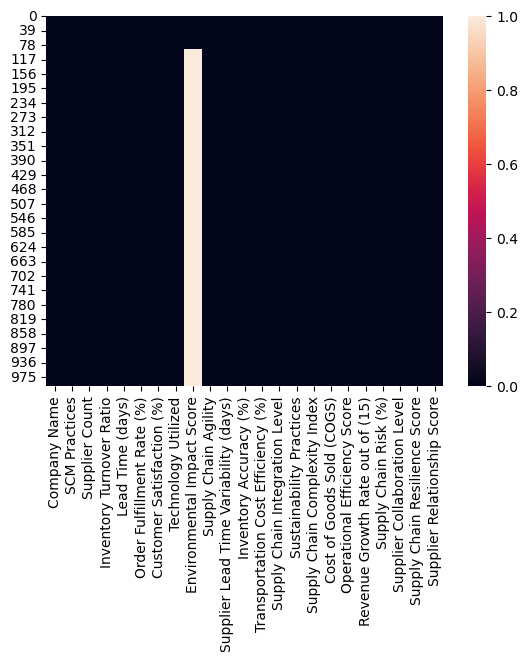

In [7]:
sns.heatmap(df.isnull())

In [8]:
# Drop missing data
df.drop("Environmental Impact Score" ,axis=1 , inplace = True)
df.dropna(axis=0 , inplace=True)
print("Data dim:",df.shape)

Data dim: (999, 22)


In [9]:
df.isnull().sum()

Company Name                             0
SCM Practices                            0
Supplier Count                           0
Inventory Turnover Ratio                 0
Lead Time (days)                         0
Order Fulfillment Rate (%)               0
Customer Satisfaction (%)                0
Technology Utilized                      0
Supply Chain Agility                     0
Supplier Lead Time Variability (days)    0
Inventory Accuracy (%)                   0
Transportation Cost Efficiency (%)       0
Supply Chain Integration Level           0
Sustainability Practices                 0
Supply Chain Complexity Index            0
Cost of Goods Sold (COGS)                0
Operational Efficiency Score             0
Revenue Growth Rate out of (15)          0
Supply Chain Risk (%)                    0
Supplier Collaboration Level             0
Supply Chain Resilience Score            0
Supplier Relationship Score              0
dtype: int64

In [10]:
df.describe()

,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supply Chain Resilience Score,Supplier Relationship Score
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.320298e+04,6.332933,11.449449,91.734735,89.214214,3.275275,97.410410,87.151151,719.019019,83.450450,10.834835,8.954955,88.088088,83.882883
std,2.136656e+05,5.477182,4.204349,2.890920,2.265927,1.590711,1.169816,2.378969,271.875839,2.311706,1.950733,2.862054,2.858424,2.851589
min,1.000000e+02,1.000000,2.000000,87.000000,85.000000,1.000000,95.000000,80.000000,300.000000,75.000000,8.000000,3.000000,80.000000,78.000000
25%,2.000000e+02,4.500000,10.000000,90.000000,88.000000,2.000000,97.000000,85.000000,500.000000,81.000000,10.000000,8.000000,85.000000,80.000000
50%,3.000000e+02,5.500000,11.000000,91.000000,89.000000,3.000000,98.000000,88.000000,700.000000,85.000000,11.000000,10.000000,88.000000,85.000000
75%,5.000000e+02,6.200000,14.000000,93.000000,91.000000,4.000000,98.000000,88.000000,800.000000,85.000000,11.000000,10.000000,90.000000,85.000000
max,1.300000e+06,50.000000,22.000000,99.000000,94.000000,10.000000,99.000000,92.000000,1500.000000,90.000000,20.000000,15.000000,95.000000,90.000000


In [11]:
# Devide the features into catogrical and numerical features.
cat = df.select_dtypes(include="O").columns.to_list()
num = [i for i in df.columns if i not in cat]

In [12]:
# Duplicated companies = 222
df['Company Name'].duplicated().value_counts()

Company Name
False    777
True     222
Name: count, dtype: int64

In [13]:
# grouping by company df.groupby('Group')['Category'].agg(lambda x: x.mode()[0]
df = pd.concat([df.groupby('Company Name')[cat].agg(lambda x: x.mode()[0]) ,df.groupby("Company Name")[num].mean()], axis=1)

print("Data dim:",df.shape)
#To aggregate data grouped by Company Name:
#For categorical columns, it selects the most frequent value in each group.
#For numerical columns, it calculates the average in each group.
#The combined result provides a summary of each company's data.

Data dim: (777, 22)


In [14]:
# duplication in the Technology Utilized
display(df["Technology Utilized"].value_counts())

Technology Utilized
ERP, AI, Blockchain         556
ERP, AI, Robotics           112
AI, ERP, Blockchain          54
ERP, JIT, Robotics           28
AI, Robotics, Blockchain     27
Name: count, dtype: int64

In [15]:
# Apply standrization to the 'Technology Utilized' column
df['Technology Utilized'] = df['Technology Utilized'].apply(lambda x: ', '.join(sorted(x.split(', '))))
display(df['Technology Utilized'].value_counts())

#Standardization will Ensures that identical sets of technologies (in different orders) are treated as the same.

Technology Utilized
AI, Blockchain, ERP         610
AI, ERP, Robotics           112
ERP, JIT, Robotics           28
AI, Blockchain, Robotics     27
Name: count, dtype: int64

In [16]:
# The most frequnte technology used by the compnay
technology_counts = df['Technology Utilized'].str.split(', ').explode().value_counts()
display(technology_counts)

Technology Utilized
ERP           750
AI            749
Blockchain    637
Robotics      167
JIT            28
Name: count, dtype: int64

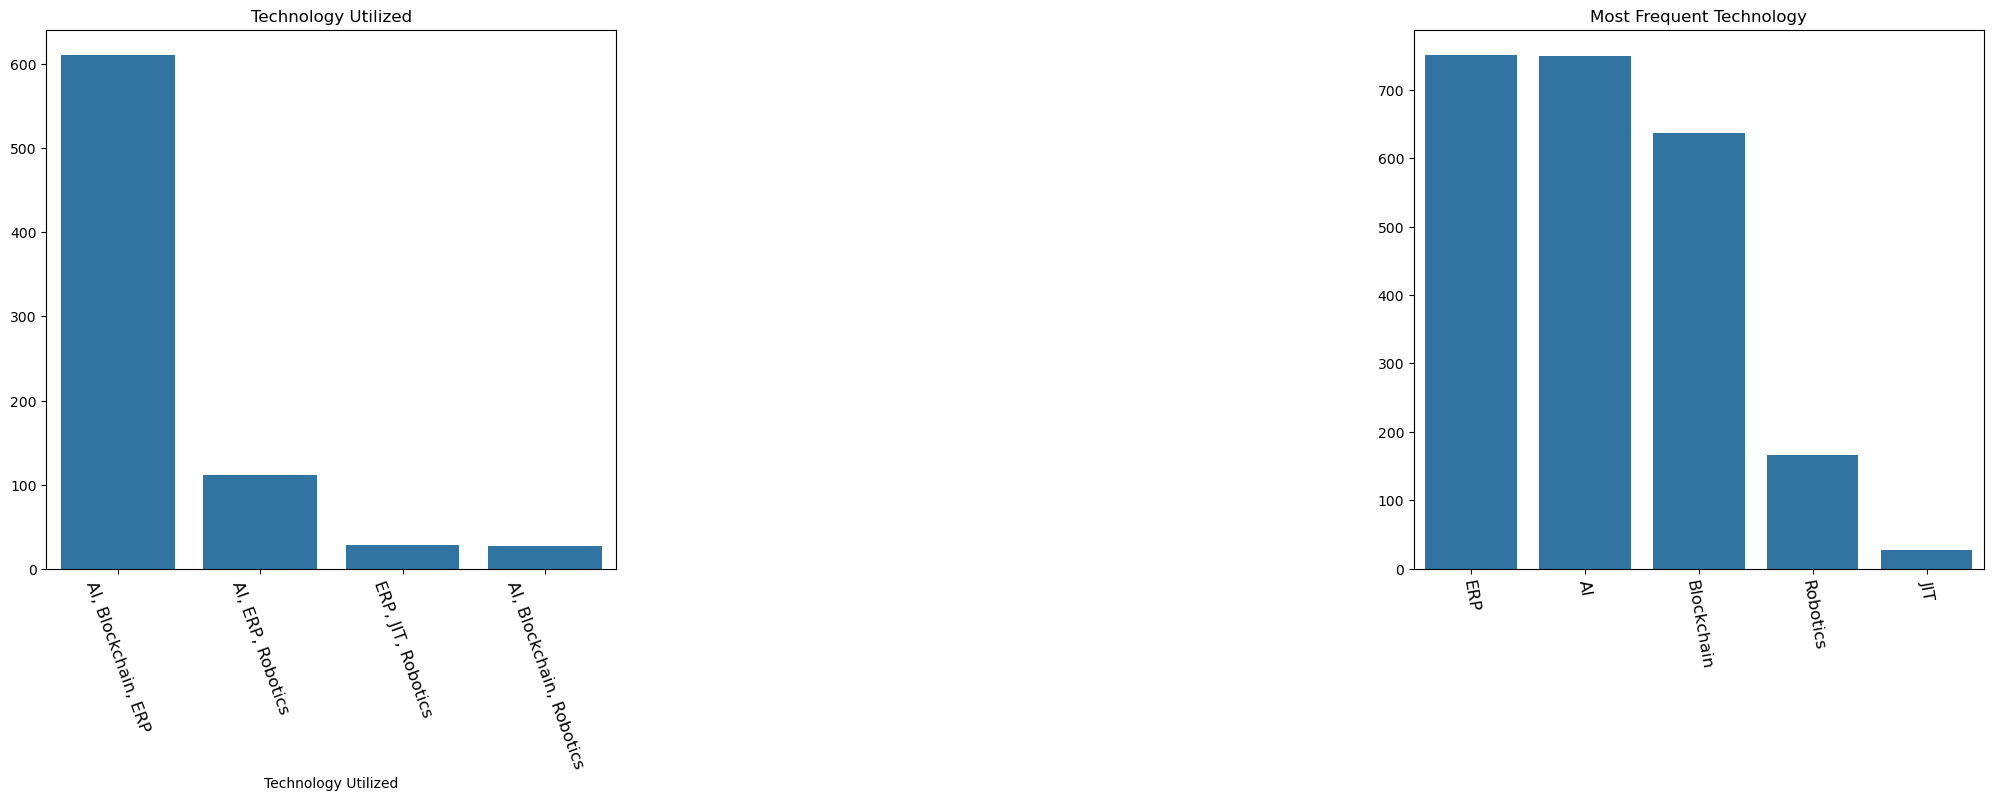

In [17]:
plt.figure(figsize=(25,7))

plt.subplot(1, 3, 1)
bp1 = sns.barplot(x= df['Technology Utilized'].value_counts().index , y=df['Technology Utilized'].value_counts().values)
bp1.set(xticklabels=list(df['Technology Utilized'].value_counts().index))
bp1.set_xticklabels(bp1.get_xticklabels(), rotation=-70, size = 12)
plt.title("Technology Utilized")


plt.subplot(1, 3, 3)
bp3= sns.barplot(x= technology_counts.index.values , y= technology_counts.values)
bp3.set(xticklabels=list(technology_counts.index.values))
bp3.set_xticklabels(bp3.get_xticklabels(), rotation=-80, size = 12)
plt.title("Most Frequent Technology")


plt.show()

#This figure show that AI, ERP and Blockchain are the most used technologyes

In [18]:
for feat in  ["SCM Practices","Supply Chain Agility","Supply Chain Integration Level","Supply Chain Complexity Index","Supplier Collaboration Level"]:
    display(df[feat].value_counts(normalize= False))
    print("-"*20)
#Agile SCM, Lean Manufacturing and Vendor Managed Inventory is the most used SCM practices.
#Almost companies in the data have high 'Supply power'.

SCM Practices
Agile SCM                      263
Lean Manufacturing             248
Vendor Managed Inventory       122
Sustainable SCM                 49
Demand-Driven SCM               46
Just-In-Time                    26
Cross-Docking                   14
Efficient Consumer Response      9
Name: count, dtype: int64

--------------------


Supply Chain Agility
High      669
Medium    108
Name: count, dtype: int64

--------------------


Supply Chain Integration Level
High      642
Medium    135
Name: count, dtype: int64

--------------------


Supply Chain Complexity Index
Medium    444
High      196
Low       137
Name: count, dtype: int64

--------------------


Supplier Collaboration Level
High      555
Medium    222
Name: count, dtype: int64

--------------------


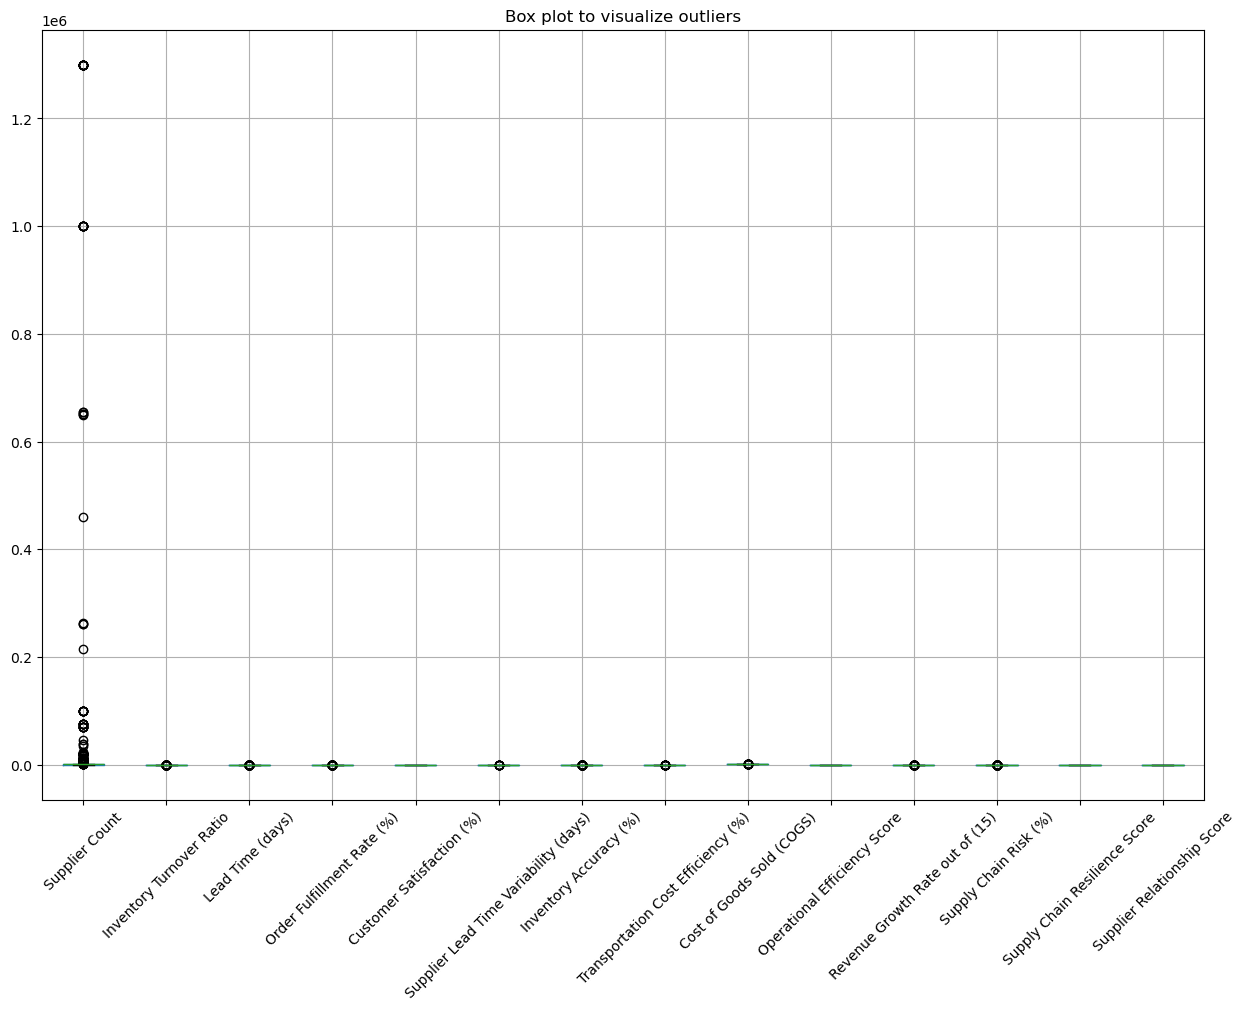

In [19]:
# Show the plot
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
df.boxplot(rot=45)
plt.title('Box plot to visualize outliers')
plt.show()

In [20]:
# Print the total number of rows in the dataset
# Remove outliers using IQR method
# IQR (Interquartile Range): It describes the spread of the middle 50% of the dataset.
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1

# Display Q1, Q3, and IQR for verification
print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

print(f'Checking length of the entire data frame {len(df)}')

# Applying capping to handle outliers 
for col in num: 
    lower_bound = Q1[col] - 1.5 * IQR[col] 
    upper_bound = Q3[col] + 1.5 * IQR[col] 
    df[col] = df[col].apply(lambda x: max(min(x, upper_bound), lower_bound))

print(f'Checking length of the entire data frame {len(df)}')

# The lambda function lambda x: max(min(x, upper_bound), lower_bound) is applied to each value in the column col.
# This function ensures that any value x outside the range [lower_bound, upper_bound] 
# is capped (replaced) by the nearest boundary value (lower_bound if x is less than lower_bound, or upper_bound if x is greater than upper_bound).

Q1:
 Supplier Count                           200.0
Inventory Turnover Ratio                   4.5
Lead Time (days)                          10.0
Order Fulfillment Rate (%)                90.0
Customer Satisfaction (%)                 88.0
Supplier Lead Time Variability (days)      2.0
Inventory Accuracy (%)                    97.0
Transportation Cost Efficiency (%)        85.0
Cost of Goods Sold (COGS)                500.0
Operational Efficiency Score              81.0
Revenue Growth Rate out of (15)           10.0
Supply Chain Risk (%)                      8.0
Supply Chain Resilience Score             85.0
Supplier Relationship Score               80.0
Name: 0.25, dtype: float64

Q3:
 Supplier Count                           500.0
Inventory Turnover Ratio                   6.2
Lead Time (days)                          13.6
Order Fulfillment Rate (%)                93.0
Customer Satisfaction (%)                 90.5
Supplier Lead Time Variability (days)      4.0
Inventory Accuracy (%)

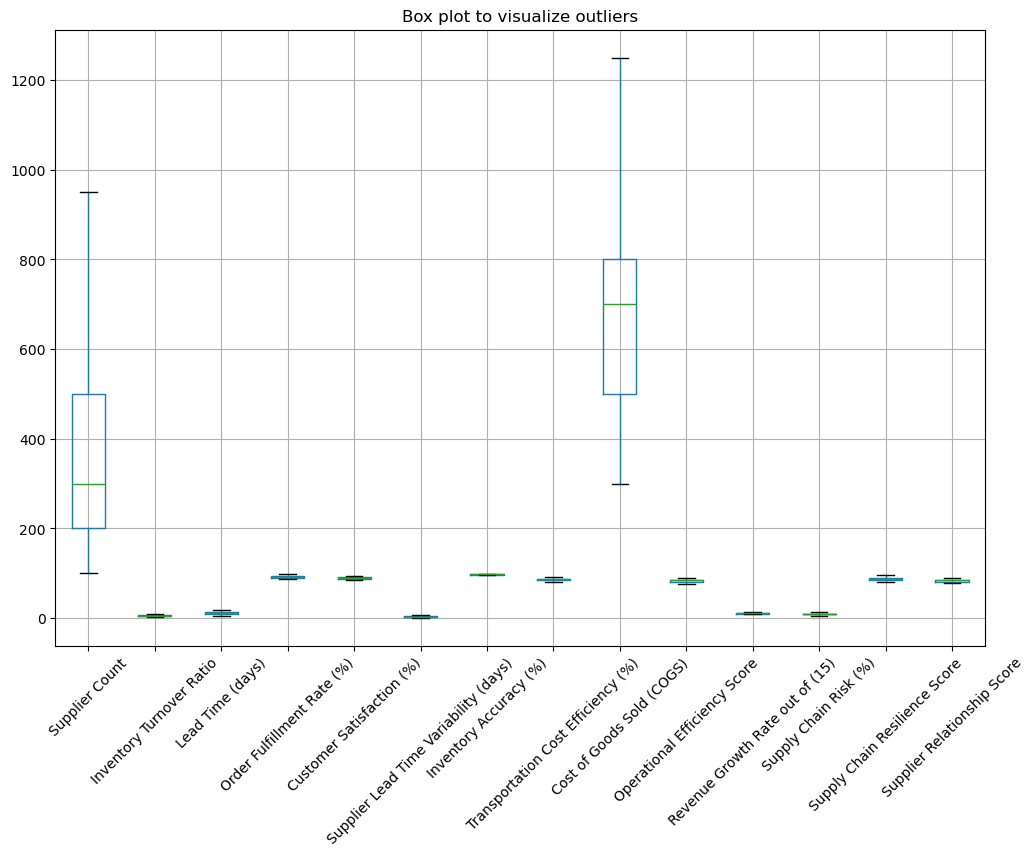

In [21]:
 #Show the plot
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
df[num].boxplot(rot=45)
plt.title('Box plot to visualize outliers')
plt.show()

In [22]:
numerical_cols=df.select_dtypes(["int","float"]).columns
numerical_cols

Index(['Supplier Count', 'Inventory Turnover Ratio', 'Lead Time (days)',
       'Order Fulfillment Rate (%)', 'Customer Satisfaction (%)',
       'Supplier Lead Time Variability (days)', 'Inventory Accuracy (%)',
       'Transportation Cost Efficiency (%)', 'Cost of Goods Sold (COGS)',
       'Operational Efficiency Score', 'Revenue Growth Rate out of (15)',
       'Supply Chain Risk (%)', 'Supply Chain Resilience Score',
       'Supplier Relationship Score'],
      dtype='object')

In [23]:
from scipy.stats import skew
skewness = df[numerical_cols].apply(lambda x: skew(x))
print("Skewness of the features before transformation:")
print(skewness)

Skewness of the features before transformation:
Supplier Count                           0.889169
Inventory Turnover Ratio                 0.476188
Lead Time (days)                         0.386264
Order Fulfillment Rate (%)               0.638926
Customer Satisfaction (%)               -0.216212
Supplier Lead Time Variability (days)    0.267904
Inventory Accuracy (%)                  -0.400994
Transportation Cost Efficiency (%)      -0.252604
Cost of Goods Sold (COGS)                0.468001
Operational Efficiency Score            -0.566306
Revenue Growth Rate out of (15)          0.065175
Supply Chain Risk (%)                   -0.093604
Supply Chain Resilience Score            0.390564
Supplier Relationship Score             -0.128153
dtype: float64


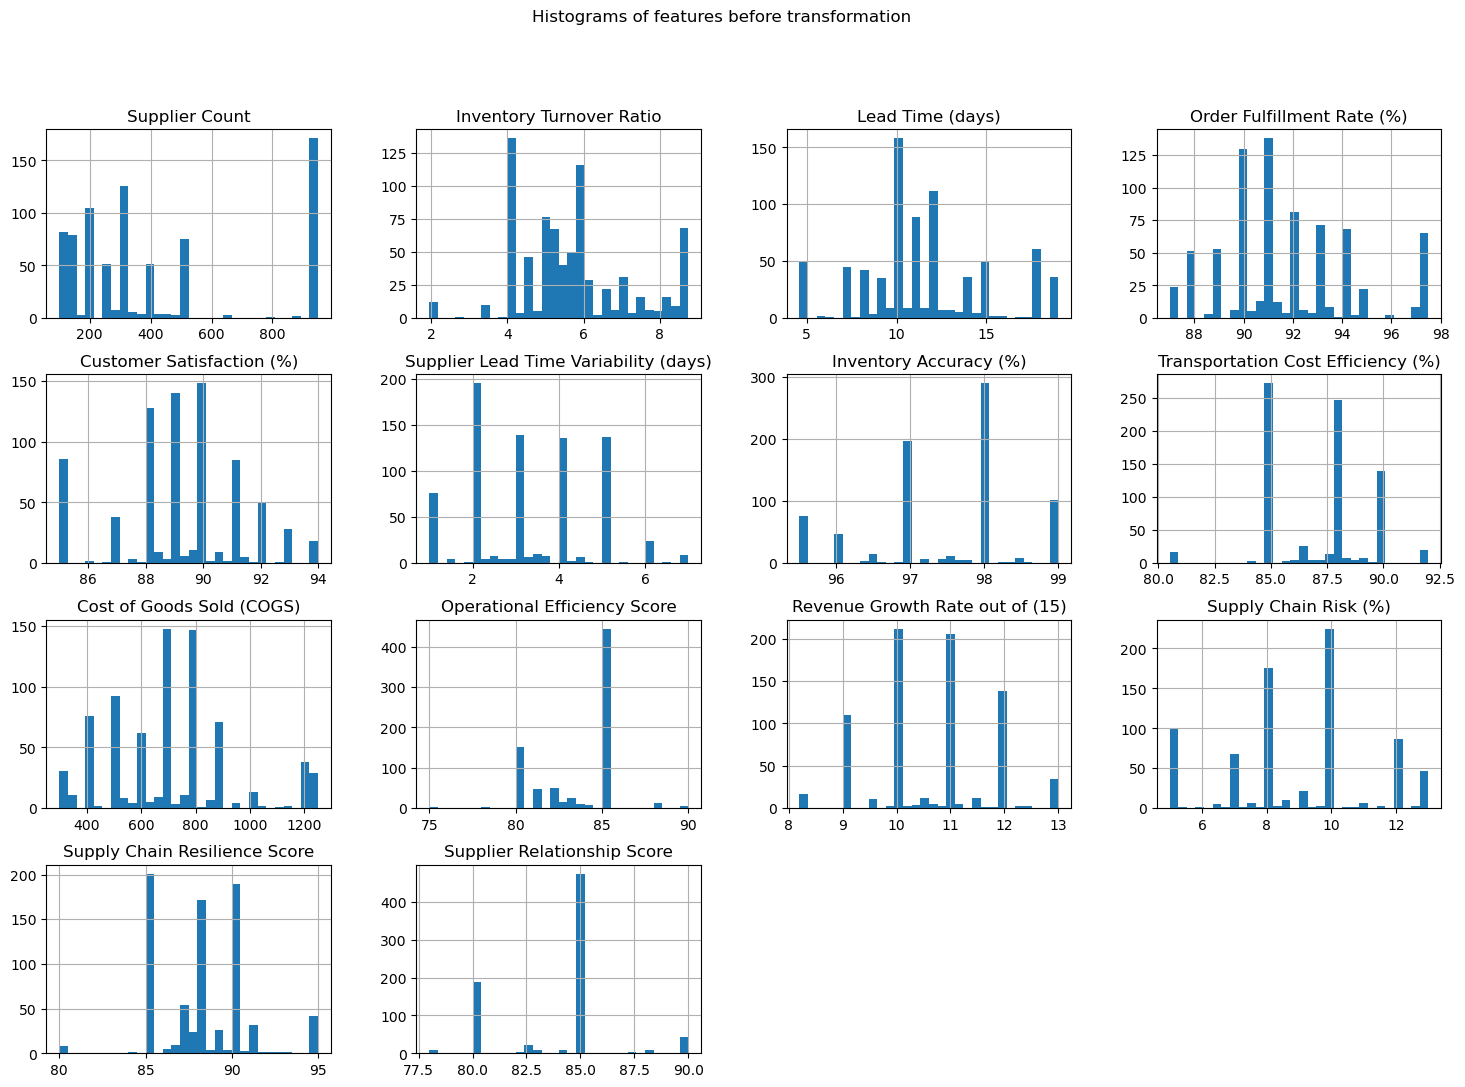

In [24]:
# Show the plot
# Visualize skewness 
# Plot KDE for each numerical column
#df[numerical_cols].plot(kind='density', subplots=True, layout=(len(numerical_cols) // 3 + 1, 3), figsize=(15, 10), sharex=False, sharey=False)

#plt.suptitle('KDE Plots of Features befor transformation', fontsize=16)
#plt.tight_layout(pad=2.0)
#plt.show()

df[numerical_cols].hist(bins=30, figsize=(18, 12))
plt.suptitle('Histograms of features before transformation')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[numerical_cols] = ss.fit_transform(pd.DataFrame(df[numerical_cols]))

In [26]:
skewness = df[numerical_cols].apply(lambda x: skew(x))
print("Skewness of the features after transformation:")
print(skewness)

Skewness of the features after transformation:
Supplier Count                           0.889169
Inventory Turnover Ratio                 0.476188
Lead Time (days)                         0.386264
Order Fulfillment Rate (%)               0.638926
Customer Satisfaction (%)               -0.216212
Supplier Lead Time Variability (days)    0.267904
Inventory Accuracy (%)                  -0.400994
Transportation Cost Efficiency (%)      -0.252604
Cost of Goods Sold (COGS)                0.468001
Operational Efficiency Score            -0.566306
Revenue Growth Rate out of (15)          0.065175
Supply Chain Risk (%)                   -0.093604
Supply Chain Resilience Score            0.390564
Supplier Relationship Score             -0.128153
dtype: float64


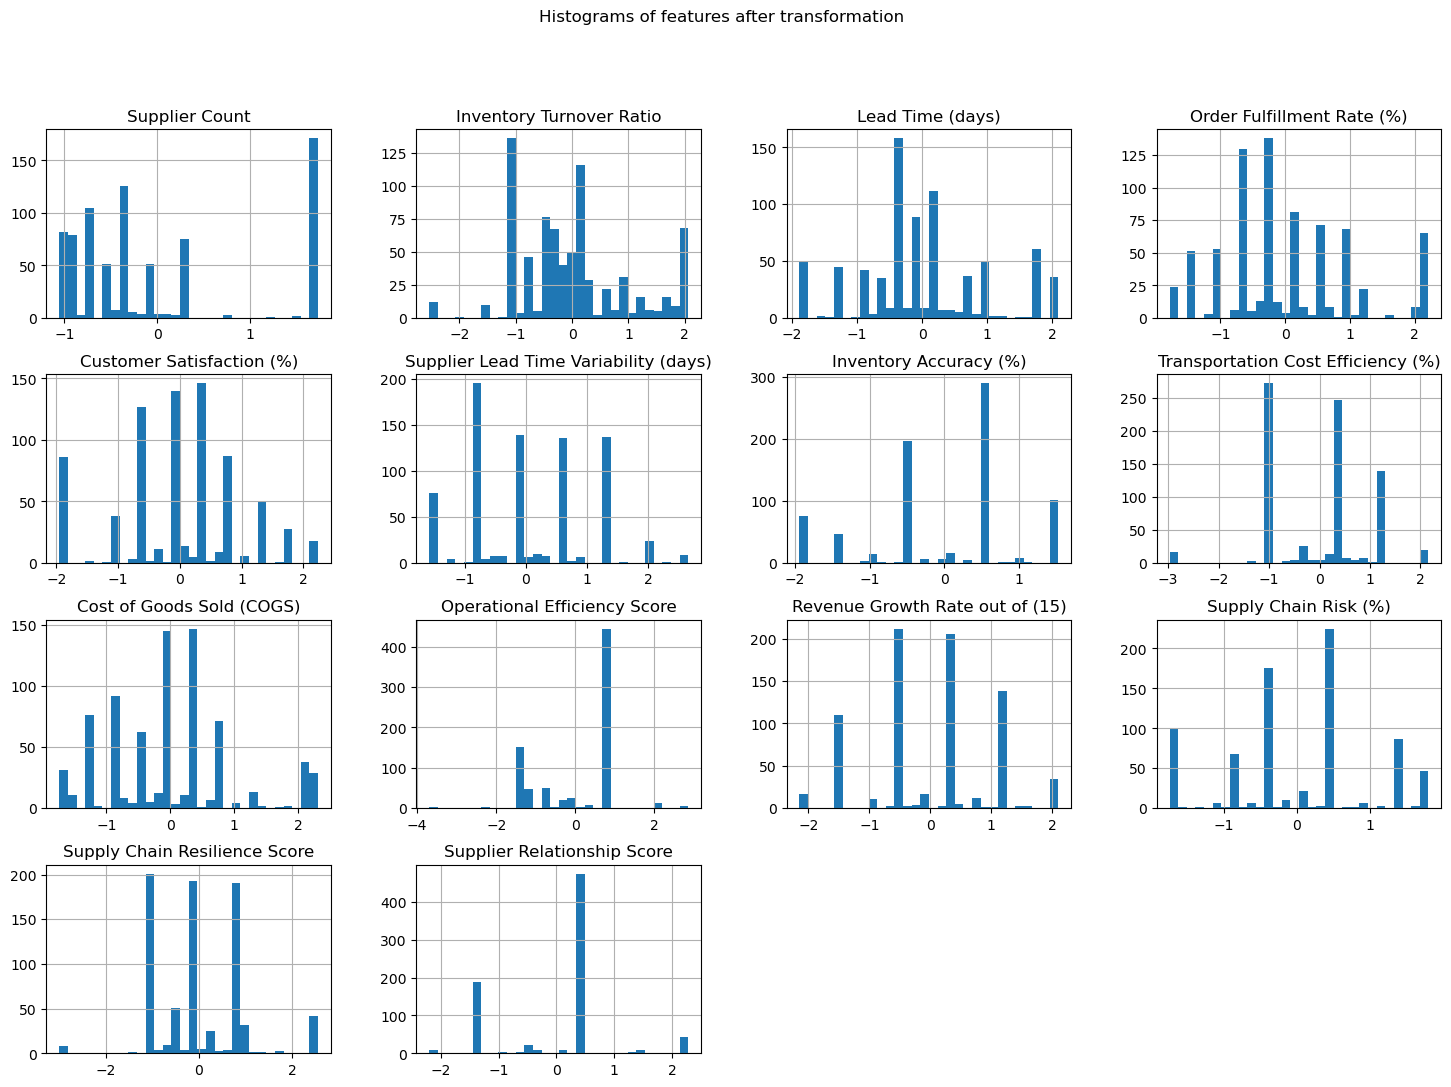

In [27]:
df[numerical_cols].hist(bins=30, figsize=(18, 12))
plt.suptitle('Histograms of features after transformation')
plt.show()

In [28]:
df.select_dtypes("object").head(2)

,Company Name,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Supplier Collaboration Level
Company Name,,,,,,,,
23andMe,23andMe,Lean Manufacturing,"AI, Blockchain, ERP",High,High,Advanced,Medium,High
AAA Car Care,AAA Car Care,Agile SCM,"AI, Blockchain, ERP",High,High,Advanced,High,High


In [29]:
categorical_cols=df.select_dtypes("object").columns

In [30]:
pd.get_dummies(categorical_cols).astype('int')

,Company Name,SCM Practices,Supplier Collaboration Level,Supply Chain Agility,Supply Chain Complexity Index,Supply Chain Integration Level,Sustainability Practices,Technology Utilized
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(categorical_cols)

array([0, 1, 7, 3, 5, 6, 4, 2])

In [32]:
o_c=df.select_dtypes("object").columns
o_c

Index(['Company Name', 'SCM Practices', 'Technology Utilized',
       'Supply Chain Agility', 'Supply Chain Integration Level',
       'Sustainability Practices', 'Supply Chain Complexity Index',
       'Supplier Collaboration Level'],
      dtype='object')

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[o_c]=oe.fit_transform(df[o_c])

In [34]:
df[o_c]

,Company Name,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Supplier Collaboration Level
Company Name,,,,,,,,
23andMe,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
AAA Car Care,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAMA Agricultural Solutions,2.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
AK Steel,3.0,5.0,3.0,0.0,0.0,0.0,2.0,1.0
AK Steel Holding,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Zuari Agro Chemicals Ltd.,772.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
Zuari Global Limited,773.0,7.0,0.0,0.0,0.0,0.0,2.0,0.0
eClinicalWorks,774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])
df.head(4)

,Company Name,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Supplier Collaboration Level,Supplier Count,Inventory Turnover Ratio,...,Customer Satisfaction (%),Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supply Chain Resilience Score,Supplier Relationship Score
Company Name,,,,,,,,,,,,,,,,,,,,,
23andMe,-1.729823,0.595140,-0.497922,-0.40179,-0.458563,0.0,0.801353,-0.632456,0.256969,0.203293,...,-0.554437,1.242744,-1.444643,-0.965313,-1.523045,-0.637234,0.331404,-0.413383,-0.403872,0.413602
AAA Car Care,-1.725365,-1.239874,-0.497922,-0.40179,-0.458563,0.0,-1.552717,-0.632456,-0.530891,-0.107197,...,-0.274960,-0.593602,0.143408,0.373023,1.245455,-0.113671,0.508199,-0.766754,0.782129,0.786592
ADAMA Agricultural Solutions,-1.720906,0.595140,-0.497922,-0.40179,-0.458563,0.0,0.801353,-0.632456,1.734207,-0.134196,...,-0.088643,-0.876117,0.540421,1.265247,-0.032314,0.671674,1.215376,-0.855096,0.708004,0.413602
AK Steel,-1.716448,0.595140,2.966725,-0.40179,-0.458563,0.0,0.801353,1.581139,1.734207,-1.146664,...,-0.088643,1.242744,-1.940909,-0.965313,-0.032314,-0.637234,-0.552568,1.353468,-1.145123,-1.451351


In [36]:
df.head(2)

,Company Name,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Supplier Collaboration Level,Supplier Count,Inventory Turnover Ratio,...,Customer Satisfaction (%),Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supply Chain Resilience Score,Supplier Relationship Score
Company Name,,,,,,,,,,,,,,,,,,,,,
23andMe,-1.729823,0.595140,-0.497922,-0.40179,-0.458563,0.0,0.801353,-0.632456,0.256969,0.203293,...,-0.554437,1.242744,-1.444643,-0.965313,-1.523045,-0.637234,0.331404,-0.413383,-0.403872,0.413602
AAA Car Care,-1.725365,-1.239874,-0.497922,-0.40179,-0.458563,0.0,-1.552717,-0.632456,-0.530891,-0.107197,...,-0.274960,-0.593602,0.143408,0.373023,1.245455,-0.113671,0.508199,-0.766754,0.782129,0.786592


In [37]:
features=df.drop("Supply Chain Risk (%)",axis=1)
features

,Company Name,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Sustainability Practices,Supply Chain Complexity Index,Supplier Collaboration Level,Supplier Count,Inventory Turnover Ratio,...,Order Fulfillment Rate (%),Customer Satisfaction (%),Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Resilience Score,Supplier Relationship Score
Company Name,,,,,,,,,,,,,,,,,,,,,
23andMe,-1.729823,0.595140,-0.497922,-0.401790,-0.458563,0.0,0.801353,-0.632456,0.256969,0.203293,...,-0.643685,-0.554437,1.242744,-1.444643,-0.965313,-1.523045,-0.637234,0.331404,-0.403872,0.413602
AAA Car Care,-1.725365,-1.239874,-0.497922,-0.401790,-0.458563,0.0,-1.552717,-0.632456,-0.530891,-0.107197,...,0.649101,-0.274960,-0.593602,0.143408,0.373023,1.245455,-0.113671,0.508199,0.782129,0.786592
ADAMA Agricultural Solutions,-1.720906,0.595140,-0.497922,-0.401790,-0.458563,0.0,0.801353,-0.632456,1.734207,-0.134196,...,0.877239,-0.088643,-0.876117,0.540421,1.265247,-0.032314,0.671674,1.215376,0.708004,0.413602
AK Steel,-1.716448,0.595140,2.966725,-0.401790,-0.458563,0.0,0.801353,1.581139,1.734207,-1.146664,...,-1.404147,-0.088643,1.242744,-1.940909,-0.965313,-0.032314,-0.637234,-0.552568,-1.145123,-1.451351
AK Steel Holding,-1.711990,1.329145,-0.497922,-0.401790,-0.458563,0.0,-1.552717,-0.632456,-0.071306,0.878271,...,0.116777,-1.020231,-0.876117,0.540421,1.265247,0.819532,0.671674,0.331404,1.078630,0.413602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuari Agro Chemicals Ltd.,1.711990,-0.505869,-0.497922,-0.401790,-0.458563,0.0,0.801353,-0.632456,-1.056131,-1.011668,...,0.497008,0.842946,-0.876117,0.540421,0.373023,0.393609,0.671674,-0.552568,0.708004,0.413602
Zuari Global Limited,1.716448,1.329145,-0.497922,-0.401790,-0.458563,0.0,0.801353,-0.632456,-0.399581,0.878271,...,0.116777,0.842946,0.536457,0.540421,-0.965313,-0.884161,-1.509839,1.215376,0.337379,0.413602
eClinicalWorks,1.720906,-1.239874,-0.497922,-0.401790,-0.458563,0.0,-1.552717,-0.632456,-0.727856,0.203293,...,0.116777,-0.088643,-0.876117,0.540421,1.265247,0.393609,0.671674,-0.552568,0.708004,0.413602


In [38]:
target=df["Supply Chain Risk (%)"]
target

Company Name
23andMe                           -0.413383
AAA Car Care                      -0.766754
ADAMA Agricultural Solutions      -0.855096
AK Steel                           1.353468
AK Steel Holding                  -0.413383
                                     ...   
Zuari Agro Chemicals Ltd.         -0.413383
Zuari Global Limited              -0.413383
eClinicalWorks                    -0.413383
iRhythm Technologies               1.353468
thyssenkrupp Materials NA, Inc.   -0.855096
Name: Supply Chain Risk (%), Length: 777, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [40]:
print(xtrain.shape,ytrain.shape)

(543, 21) (543,)


In [41]:
print(xtest.shape,ytest.shape)

(234, 21) (234,)


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain, ytrain)
ypred=lr.predict(xtest)

In [43]:
lr.coef_

array([-2.07153487e-03, -1.24020943e-02, -2.58180806e-02,  8.14610040e-03,
        2.28911792e-02,  2.77555756e-17, -1.81090239e-02, -6.77259388e-02,
       -1.93460877e-02,  7.86845689e-03,  5.48078587e-01, -4.67944370e-02,
        2.68174700e-02,  1.71896353e-01,  1.85153731e-01,  8.62405153e-02,
        6.26087270e-02, -1.05169278e-02, -1.90299853e-01, -4.09882304e-01,
        1.80748927e-02])

In [44]:
lr.intercept_

2.425030127314919e-05

In [45]:
pd.DataFrame(lr.coef_,index=features.columns,columns=["Coefficients"])

,Coefficients
Company Name,-2.071535e-03
SCM Practices,-1.240209e-02
Technology Utilized,-2.581808e-02
Supply Chain Agility,8.146100e-03
Supply Chain Integration Level,2.289118e-02
Sustainability Practices,2.775558e-17
Supply Chain Complexity Index,-1.810902e-02
Supplier Collaboration Level,-6.772594e-02
Supplier Count,-1.934609e-02
Inventory Turnover Ratio,7.868457e-03


In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"mae : {mae}\nmse : {mse}\nrmse : {rmse}\nr2_score : {r2}") 

mae : 0.23001834199537255
mse : 0.09419432581188564
rmse : 0.30691094117330786
r2_score : 0.9037856507637343


In [47]:
lr.score(xtrain,ytrain) # training accuracy

0.9225077409312943

In [48]:
lr.score(xtest , ytest) # testing accuracy

0.9037856507637343

In [49]:
from sklearn.linear_model import Lasso

In [50]:
#hyperparamter tuning for lambda  or alpha
#hyper parameter tunning is the process os selecting the optimal values for machine learning models 
for i in range (200,1001,50):  #The loop iterates over the range of lambda (or alpha) values, starting from 200 to 1000, incrementing by 50 in each step.
    la = Lasso(i)
    la.fit(xtrain,ytrain)
    score_train=la.score(xtrain,ytrain)
    score_test=la.score(xtest,ytest)
    print("Lambda or alpha value : ")
    print(f"{i} Train_Score{score_train} Test_Score{score_test}")

Lambda or alpha value : 
200 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
250 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
300 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
350 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
400 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
450 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
500 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
550 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
600 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
650 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
700 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
750 Train_Score0.0 Test_Score-9.521585532890064e-05
Lambda or alpha value : 
800 Train_Score0.0 Test_Score-9.521585532890064e-05

In [51]:
la = Lasso(200)
la.fit(xtrain,ytrain)
ypred=la.predict(xtest)
print(f"Train_Score{score_train} Test_Score{score_test}")

Train_Score0.0 Test_Score-9.521585532890064e-05


In [52]:
d={"Column_Name": features.columns, "Coefficients":la.coef_}  #feature extraction
df1=pd.DataFrame(d)
df1

,Column_Name,Coefficients
0,Company Name,0.0
1,SCM Practices,0.0
2,Technology Utilized,0.0
3,Supply Chain Agility,0.0
4,Supply Chain Integration Level,0.0
5,Sustainability Practices,0.0
6,Supply Chain Complexity Index,0.0
7,Supplier Collaboration Level,0.0
8,Supplier Count,-0.0
9,Inventory Turnover Ratio,-0.0


In [53]:
from sklearn.linear_model import Ridge

In [54]:
for i in range (1,51):
    ri = Ridge(i)
    ri.fit(xtrain,ytrain)
    score_train=ri.score(xtrain,ytrain)
    score_test=ri.score(xtest,ytest)
    print("Lambda or alpha value : ")
    print(f"{i} Train_Score{score_train} Test_Score{score_test}")

Lambda or alpha value : 
1 Train_Score0.9224907251570638 Test_Score0.9043260100328967
Lambda or alpha value : 
2 Train_Score0.9224444518200411 Test_Score0.904790353477654
Lambda or alpha value : 
3 Train_Score0.9223748312761535 Test_Score0.9051904732931421
Lambda or alpha value : 
4 Train_Score0.9222864483174872 Test_Score0.9055358813459737
Lambda or alpha value : 
5 Train_Score0.9221828897402746 Test_Score0.9058343231814384
Lambda or alpha value : 
6 Train_Score0.9220669833038311 Test_Score0.9060921613580945
Lambda or alpha value : 
7 Train_Score0.9219409740894874 Test_Score0.9063146647901158
Lambda or alpha value : 
8 Train_Score0.9218066560581178 Test_Score0.9065062295818487
Lambda or alpha value : 
9 Train_Score0.9216654711595649 Test_Score0.9066705493159946
Lambda or alpha value : 
10 Train_Score0.9215185846804761 Test_Score0.9068107476234387
Lambda or alpha value : 
11 Train_Score0.9213669430128969 Test_Score0.9069294823097461
Lambda or alpha value : 
12 Train_Score0.921211318293

In [55]:
ri = Ridge(1)
ri.fit(xtrain,ytrain)
ypred=ri.predict(xtest)
print(f"Train_Score{score_train} Test_Score{score_test}")

Train_Score0.9145134119919989 Test_Score0.9050122371858074


In [56]:
d={"Column_Name": features.columns, "Coefficients":ri.coef_}  #feature extraction
df1=pd.DataFrame(d)
df1

,Column_Name,Coefficients
0,Company Name,-0.002132
1,SCM Practices,-0.012351
2,Technology Utilized,-0.027975
3,Supply Chain Agility,0.007282
4,Supply Chain Integration Level,0.024399
5,Sustainability Practices,0.000000
6,Supply Chain Complexity Index,-0.017822
7,Supplier Collaboration Level,-0.062342
8,Supplier Count,-0.019007
9,Inventory Turnover Ratio,0.007442


In [57]:
from sklearn.model_selection import cross_val_score
l1=Lasso(200)
scores = cross_val_score(l1,features,target,cv=5)   
scores
#the dataset is split into 5 parts 
#with each part serving as the test set once while the remaining 4 parts are used for training 

array([-0.01568825, -0.00131231, -0.03640951, -0.00275475, -0.02674745])

In [58]:
np.mean(scores)

-0.016582454447752814

In [59]:
l2=Ridge(2)
scores=cross_val_score(l2,features,target,cv=5)
scores

array([0.89743691, 0.91312261, 0.92756167, 0.91961423, 0.90145512])

In [60]:
np.mean(scores)

0.9118381061748737

In [61]:
#average cross validation scores of lasso is -16% & ridge 91%,
#ridge is performing better in this datasets.

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"mae : {mae}\nmse : {mse}\nrmse : {rmse}\nr2_score : {r2}") 

mae : 0.04882751095519513
mse : 0.02046526172174813
rmse : 0.143056847867371
r2_score : 0.9790958550683804


In [64]:
dt.feature_importances_

array([6.45237182e-04, 5.17376216e-04, 0.00000000e+00, 3.40580908e-03,
       2.34121061e-02, 0.00000000e+00, 0.00000000e+00, 8.66120154e-04,
       4.68619908e-04, 2.37404694e-04, 8.67621691e-01, 2.69870062e-02,
       6.25265265e-04, 2.68238167e-03, 1.51178385e-02, 1.08184453e-02,
       1.54229497e-03, 6.44530917e-04, 2.58205707e-02, 1.73025194e-02,
       1.28478260e-03])

In [65]:
dic={"Input feature" : features.columns,"Information Gain" : dt.feature_importances_}
df1=pd.DataFrame(dic)
df1

,Input feature,Information Gain
0,Company Name,0.000645
1,SCM Practices,0.000517
2,Technology Utilized,0.000000
3,Supply Chain Agility,0.003406
4,Supply Chain Integration Level,0.023412
5,Sustainability Practices,0.000000
6,Supply Chain Complexity Index,0.000000
7,Supplier Collaboration Level,0.000866
8,Supplier Count,0.000469
9,Inventory Turnover Ratio,0.000237


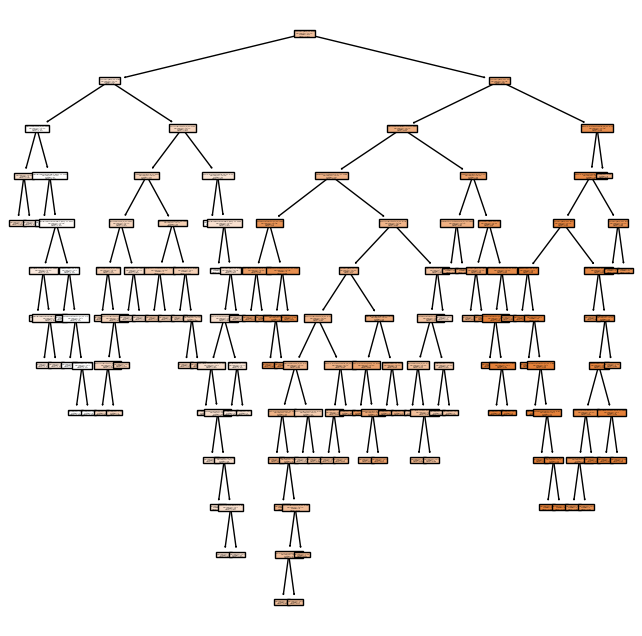

In [67]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(8,8))
tree.plot_tree(dt,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [69]:
dt.score(xtrain,ytrain)

1.0

In [71]:
dt.score(xtest,ytest)

0.9790958550683804

In [73]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "max_depth" : list(range(3,6)),
    "min_samples_split" : list(range(3,8))
}

reg = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parameters,cv=5)
reg.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7]})

In [74]:
reg.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=6)

In [77]:
reg.best_score_

0.9636663629005907

In [79]:
#once the gridsearchcv returns the tuned parameters build the model again with the tuned parameters & test the new model with test set 
dt1=DecisionTreeRegressor(max_depth=5, min_samples_split=5)
dt1.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("Trining Score",dt1.score(xtrain,ytrain))
print("Testing score",dt1.score(xtest,ytest))

Trining Score 0.9711746499041525
Testing score 0.9565686018613009


In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"mae : {mae}\nmse : {mse}\nrmse : {rmse}\nr2_score : {r2}") 

mae : 0.04882751095519513
mse : 0.02046526172174813
rmse : 0.143056847867371
r2_score : 0.9790958550683804


In [83]:
dic={"Input feature" : features.columns,"Information Gain" : dt1.feature_importances_}
df1=pd.DataFrame(dic)
df1

,Input feature,Information Gain
0,Company Name,0.000000e+00
1,SCM Practices,0.000000e+00
2,Technology Utilized,0.000000e+00
3,Supply Chain Agility,3.506897e-03
4,Supply Chain Integration Level,2.410700e-02
5,Sustainability Practices,0.000000e+00
6,Supply Chain Complexity Index,0.000000e+00
7,Supplier Collaboration Level,0.000000e+00
8,Supplier Count,0.000000e+00
9,Inventory Turnover Ratio,0.000000e+00


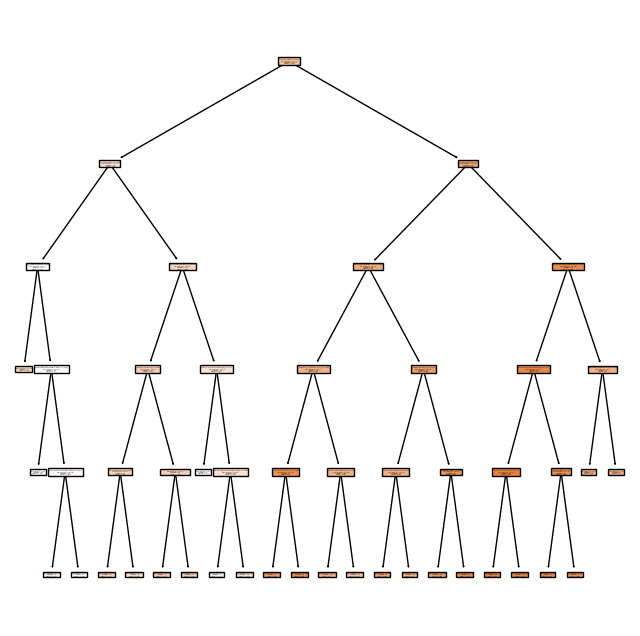

In [85]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(8,8))
tree.plot_tree(dt1,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [88]:
from sklearn.ensemble import RandomForestRegressor
reg1 = RandomForestRegressor()
reg1.fit(xtrain,ytrain)
ypred = reg1.predict(xtest)
print(reg1.score(xtrain,ytrain))
print(reg1.score(xtest,ytest))

0.9976280461386448
0.9827602178656542


In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"mae : {mae}\nmse : {mse}\nrmse : {rmse}\nr2_score : {r2}") 

mae : 0.056102558399318145
mse : 0.016877832341835472
rmse : 0.12991471179907021
r2_score : 0.9827602178656542


In [90]:
data = pd.DataFrame({'Actual': ytest,'Predicted': ypred})
data.head(5)

,Actual,Predicted
Company Name,,
Knorr-Bremse,0.470042,0.448840
Nisshin Steel,-0.413383,-0.413383
"The Japan Steel Works, Ltd.",1.353468,1.437393
Usinas Siderúrgicas de Minas Gerais (Usiminas),0.470042,0.169678
Looker,-1.738522,-1.738522


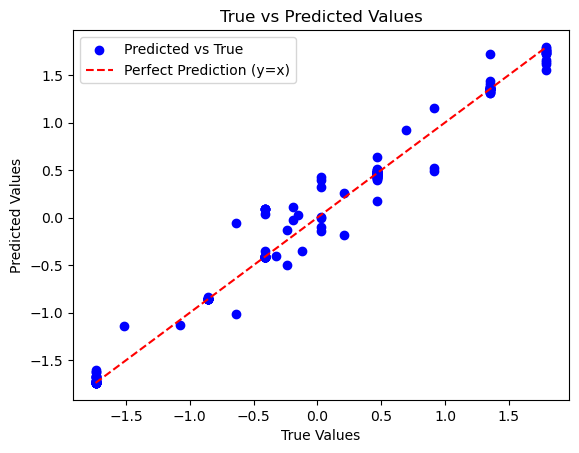

In [93]:
true_values = ytest
predicted_values = ypred
plt.scatter(true_values, predicted_values, color='blue', label='Predicted vs True')

# Add a reference line (y = x) to see how close predictions are to actual values
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', label='Perfect Prediction (y=x)')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()

# Show the plot
plt.show()